In [393]:
#use this for item-based collaborative filtering. edit data in item.csv.
#remember that for this script, data has indexes only for rows and NOT for columns 

import numpy as np
import pandas as pd
import copy
import math
#For item-based 

file = open('item.csv')
data = file.readlines()

lst = [[j for j in i.strip().split(',')] for i in data]
missing_index = 0
for idx, i in enumerate(lst):
    if '?' in i:
        missing_index = i.index('?')
        missing_index_row = idx

train_data = [i for i in lst if '?' not in i]
train_data = [[float(j) for j in i] for i in train_data]
train_data = np.array(train_data)

trainDF = pd.DataFrame(train_data)
trainDF = trainDF.set_index(0)
print('\n\n\nso, after dropping the user with missing rating, we have the following remaining rows')
display(trainDF)

print('\n\nNow, We will calculate mean rating for each user\n')
tempDF = copy.deepcopy(trainDF)
tempDF['mean'] = trainDF.mean(axis=1)


display(tempDF)

print('\n\nNow, we will perform centralisation\n\n')
for index, rows in trainDF.iterrows():
    trainDF.loc[index] = trainDF.loc[index] - tempDF['mean'][index]

display(trainDF)
    
print('\n\nnow after centralisation, we will calculate the L2 Norm and add it to the table')
print('L2 norm is the square root of sum of squares of ratings for a particular item')
norms = []
for columns in trainDF:
    norm = 0
    for j in trainDF[columns]:
        norm = norm + j*j
    norm = round(math.sqrt(norm), 3)
    norms.append(norm)
    
l2DF = copy.deepcopy(trainDF)
l2DF.loc['l2'] = norms
display(l2DF)

print('\nnow, we will calculate cosine similarity between the item that is missing a value and other items')
df = copy.deepcopy(trainDF)
for index, rows in df.iterrows():
    df.loc[index] = df.loc[index] * df[missing_index][index]
sums = df.sum(axis = 0)
sums = pd.DataFrame(sums)
cDict = {}
for index, rows in sums.iterrows():
    m = l2DF[missing_index]['l2'] * l2DF[index]['l2']
    sums.loc[index] = sums.loc[index]/m
    if index != missing_index:
        s = sums.loc[index]
        print('the cosine similarity for item ', index, ' is: ', round(s[0], 3))
        cDict[round(s[0], 3)] = index

print()
print()
print('the maximum cosine similarity is, ', max(cDict), ' for item number: ', cDict[max(cDict)])
rating = lst[0][cDict[max(cDict)]]
print('\nthe use rated item number: ', cDict[max(cDict)], ' as: ', rating, ' so the answer is, ', rating)




so, after dropping the user with missing rating, we have the following remaining rows


,1,2,3,4,5
0,,,,,
2.0,3.0,2.0,3.0,1.0,3.0
3.0,3.0,4.0,3.0,4.0,4.0
4.0,5.0,1.0,3.0,2.0,4.0
5.0,1.0,4.0,5.0,2.0,3.0




Now, We will calculate mean rating for each user



,1,2,3,4,5,mean
0,,,,,,
2.0,3.0,2.0,3.0,1.0,3.0,2.4
3.0,3.0,4.0,3.0,4.0,4.0,3.6
4.0,5.0,1.0,3.0,2.0,4.0,3.0
5.0,1.0,4.0,5.0,2.0,3.0,3.0




Now, we will perform centralisation




,1,2,3,4,5
0,,,,,
2.0,0.6,-0.4,0.6,-1.4,0.6
3.0,-0.6,0.4,-0.6,0.4,0.4
4.0,2.0,-2.0,0.0,-1.0,1.0
5.0,-2.0,1.0,2.0,-1.0,0.0




now after centralisation, we will calculate the L2 Norm and add it to the table
L2 norm is the square root of sum of squares of ratings for a particular item


,1,2,3,4,5
0,,,,,
2.0,0.600,-0.400,0.600,-1.40,0.600
3.0,-0.600,0.400,-0.600,0.40,0.400
4.0,2.000,-2.000,0.000,-1.00,1.000
5.0,-2.000,1.000,2.000,-1.00,0.000
l2,2.953,2.307,2.173,2.03,1.233



now, we will calculate cosine similarity between the item that is missing a value and other items
the cosine similarity for item  1  is:  0.582
the cosine similarity for item  2  is:  -0.731
the cosine similarity for item  3  is:  0.045
the cosine similarity for item  4  is:  -0.671


the maximum cosine similarity is,  0.582  for item number:  1

the use rated item number:  1  as:  4  so the answer is,  4


In [402]:
#### Use this is the question asks for user-based collaborative filtering. Change data in user.csv.
#### remember, data file of this question should have both row and column index
import numpy as np
import pandas as pd
import copy
import math
data = pd.read_csv('user.csv')
data = data.set_index('index')
print('\n\nbefore proceeding, check that the dataset looks like this')
display(data)
for idx, i in data.iteritems():
    for idx2, j in enumerate(i):
        if j == '?':
            missing_row = idx2 + 1
            missing_column = idx

print('\nRating is missing for item number ',missing_column, 'as reviewer number', missing_row, 'has not given any rating')
print('\nso the data that we will be working on would exlude ratings of item number',missing_column, 'initially')

tDF = data.drop(missing_column, axis = 1)
display(tDF)

print('\nNow, we will add average rating of each participant')
tDF['average'] = tDF.mean(axis=1)
display(tDF)
average = copy.deepcopy(tDF['average'])
print('\nNow, we will centralise the rows to get the x-hats')
for index, rows in tDF.iterrows():
    if index != 'average':
        tDF.loc[index] = tDF.loc[index] - tDF['average'][index]
tDF['average'] = average
display(tDF)
tDF.to_csv('ans.csv')

t2DF = copy.deepcopy(tDF)
t2DF.drop('average', axis = 1, inplace = True)
t2DF['norm'] = round(np.sqrt(np.square(t2DF).sum(axis=1)), 3)
print('\nNow, we will calculate the norms that will help in calculating cosine similarity')
display(t2DF)
t3DF = copy.deepcopy(t2DF)
t3DF.drop('norm', axis = 1, inplace = True)
cosine = {}
for idx, i in t2DF.iterrows():
    if idx != missing_row:
        s = i.mul(t3DF.loc[missing_row]).sum()
        m = t2DF['norm'][idx]*t2DF['norm'][missing_row]
        c = round(s/m, 3)
        cosine[c] = idx
        print('cosine similarity of user', idx, 'is:', c)
        
print('The highest cosine similarity is with user', cosine[max(cosine)], ':', max(cosine))

print('\nwe will add the bias of user', missing_row, 'in the centralised rating of item', missing_column, 'of user', cosine[max(cosine)])
print('so, the final answer is', float(data[missing_column][cosine[max(cosine)]]) - average[cosine[max(cosine)]] + average[missing_row])
#float(average[cosine[max(cosine)]]))



before proceeding, check that the dataset looks like this


,1,2,3,4,5
index,,,,,
1,1,2,3,3,?
2,3,4,2,3,4
3,3,3,4,4,3
4,5,4,5,4,1
5,4,5,3,2,2
6,1,2,3,2,5



Rating is missing for item number  5 as reviewer number 1 has not given any rating

so the data that we will be working on would exlude ratings of item number 5 initially


,1,2,3,4
index,,,,
1,1,2,3,3
2,3,4,2,3
3,3,3,4,4
4,5,4,5,4
5,4,5,3,2
6,1,2,3,2



Now, we will add average rating of each participant


,1,2,3,4,average
index,,,,,
1,1,2,3,3,2.25
2,3,4,2,3,3.00
3,3,3,4,4,3.50
4,5,4,5,4,4.50
5,4,5,3,2,3.50
6,1,2,3,2,2.00



Now, we will centralise the rows to get the x-hats


,1,2,3,4,average
index,,,,,
1,-1.25,-0.25,0.75,0.75,2.25
2,0.00,1.00,-1.00,0.00,3.00
3,-0.50,-0.50,0.50,0.50,3.50
4,0.50,-0.50,0.50,-0.50,4.50
5,0.50,1.50,-0.50,-1.50,3.50
6,-1.00,0.00,1.00,0.00,2.00



Now, we will calculate the norms that will help in calculating cosine similarity


,1,2,3,4,norm
index,,,,,
1,-1.25,-0.25,0.75,0.75,1.658
2,0.00,1.00,-1.00,0.00,1.414
3,-0.50,-0.50,0.50,0.50,1.000
4,0.50,-0.50,0.50,-0.50,1.000
5,0.50,1.50,-0.50,-1.50,2.236
6,-1.00,0.00,1.00,0.00,1.414


cosine similarity of user 2 is: -0.427
cosine similarity of user 3 is: 0.905
cosine similarity of user 4 is: -0.302
cosine similarity of user 5 is: -0.674
cosine similarity of user 6 is: 0.853
The highest cosine similarity is with user 3 : 0.905

we will add the bias of user 1 in the centralised rating of item 5 of user 3
so, the final answer is 1.75


## Lecture Slide 5 

### Models for cases 

#### 1. kNN - Class prediction with categorical data using overlap measure (Lecture slide - 05, page - 25)
#### 2. Gini-split calculation - Lecture slide - 05, page - page - 38
#### 3. Naive-Bayes Classifier - Lectuve slide - 05, page - 56



Before going ahead, make sure that the data looks similar


,utlook,Temperature,Humidity,Windy,Play Golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Hot,Normal,False,?



We have to predict label for Play Golf  at row number 8

Now we will calculate similarity between row 8 and other rows using this formula-


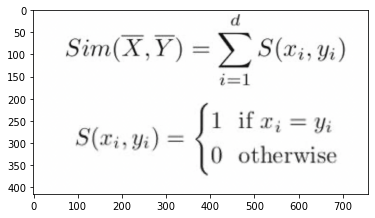

similaries are:


,utlook,Temperature,Humidity,Windy,Play Golf,sim
0,Rainy,Hot,High,False,No,3
1,Rainy,Hot,High,True,No,2
2,Overcast,Hot,High,False,Yes,2
3,Sunny,Mild,High,False,Yes,1
4,Sunny,Cool,Normal,False,Yes,2
5,Sunny,Cool,Normal,True,No,1
6,Overcast,Cool,Normal,True,Yes,1
7,Rainy,Mild,High,False,No,2
8,Rainy,Hot,Normal,False,?,



the highest similarity of row 8 is with row 0 equal to: 3
so, the predicted label is same as the label of row 0 which is: No 


In [395]:
import numpy as np
import pandas as pd
import copy
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data = pd.read_csv('overlap_measure.csv')

#Change the csv file overlap_measure.csv. For this one, remember to enter column indexes but NOT row indexes

print('\n\nBefore going ahead, make sure that the data looks similar')
display(data)
for idx, i in data.iteritems():
    for idx2, j in enumerate(i):
        if j == '?':
            missing_row = idx2
            missing_column = idx
            
print('\nWe have to predict label for', idx, 'at row number', idx2)
data2 = copy.deepcopy(data)
data2.drop(idx, axis = 1, inplace = True)

print('\nNow we will calculate similarity between row', idx2, 'and other rows using this formula-')
img = mpimg.imread('overlap.png')
imgplot = plt.imshow(img)
plt.show()
sd= {}
data['sim'] = ''

for idx3, i in data2.iterrows():
    if idx3 != idx2:
        s = sum(data2.loc[idx2] == i)
        data['sim'][idx3] = s
        sd[s] = idx3

print('similaries are:')
display(data)
print('\nthe highest similarity of row', idx2, 'is with row', sd[max(sd)], 'equal to:', max(sd))
print('so, the predicted label is same as the label of row', sd[max(sd)],  'which is:', data[idx][sd[max(sd)]])




(i)
first, we will calculate gini index for each partition
formula for calculating gini index is:


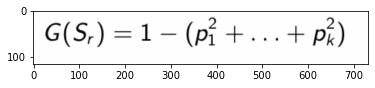


where, Sr represents a partition and pk represents the fraction of samples from k classes

G1= 1 - ((6/8)^2 + (2/8)^2 + ) = 0.375



G2= 1 - ((3/10)^2 + (7/10)^2 + ) = 0.42



now, we will calculate weighted average of gini indexes using the formula:


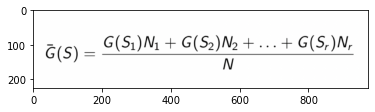

where, Nr is the number of samples in Sr and N is the sum of all Nr

G_split = 0.4





(ii)
first, we will calculate gini index for each partition
formula for calculating gini index is:


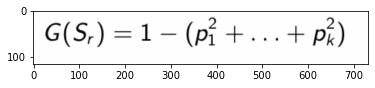


where, Sr represents a partition and pk represents the fraction of samples from k classes

G1= 1 - ((6/10)^2 + (4/10)^2 + ) = 0.48



G2= 1 - ((2/7)^2 + (5/7)^2 + ) = 0.408



now, we will calculate weighted average of gini indexes using the formula:


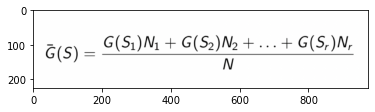

where, Nr is the number of samples in Sr and N is the sum of all Nr

G_split = 0.45





split 1 is better as its weighted average of gini indices is lower


In [290]:
#this chunk is for doing gini index calculation in case that is asked in the question paper
#the format of quesiton can be - Two different split results will be given and it will be asked that
#which split is better as per gini index. 
#in both splits, there will be a line that divides the domain in two or maybe three parts. Every part
#will have some sort of objects. They can be circle, square, or number. 
#whatever they are, count them manually and update the split_data_1 and split_data_2 list there

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#here, enter data in the split_data variable. first, count the number of objects manually
#then enter data for each splits like this - [[left_side_sqaure, left_side_circle],
#                                              [right_side_square, right_side_circle]]
split_data_1 = [[6, 2],
               [3, 7]]
split_data_2 = [[6, 4],
               [2, 5]]
print('\n\n')
def calculate_gini(data):
    total = 0
    for i in data:
        total = total +sum(i)
    print('first, we will calculate gini index for each partition')
    print('formula for calculating gini index is:')
    img = mpimg.imread('gini.png')
    imgplot = plt.imshow(img)
    plt.show()
    G = []
    print('\nwhere, Sr represents a partition and pk represents the fraction of samples from k classes\n')
    for idx, i in enumerate(data):
        s = 0
        print('G' + str(idx+1) + '=', end = ' ')
        print(str(1) + ' - (', end='')
        for j in i:
            print('(' + str(j) + '/' + str(sum(i))+ ')^2 + ', end ='')
            s = s + (j/sum(i))**2
        s = round(1 - s, 3)
        G.append(s)
        print(') = ' + str(s))
        print('\n\n')
    print('now, we will calculate weighted average of gini indexes using the formula:')
    img = mpimg.imread('gini2.png')
    imgplot = plt.imshow(img)
    plt.show()
    print('where, Nr is the number of samples in Sr and N is the sum of all Nr')
    g_split = 0
    for i in range(len(G)):
        g_split += G[i] * sum(data[i])
    g_split = round(g_split/total, 3)
    print('\nG_split =', g_split )
    print('\n\n\n\n')
    return g_split
print('(i)')
g1 = calculate_gini(split_data_1)
print('(ii)')
g2 = calculate_gini(split_data_2)

if g1 < g2:
    print('split 1 is better as its weighted average of gini indices is lower')
if g1 > g2:
    print('split 2 is better as its weighted average of gini indices is lower')

In [404]:
#Use this for questions of naive-bayes classifier
#this code would require few adjustments. 
#make sure that the name of the columns with labels matches as per data

import numpy as np
import pandas as pd
import copy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

labels = 'Class ' #adjust it as per the data. It has to be the name of the column that has class labels.
label1 = 'Y ' #adjust it as per the data. It has to be the one of the labels present in data
label2 = 'N ' #adjust it as per the data
question = ['T ', 'F ', 5] #adjust as per data 
pdic = {}
data = pd.read_csv('naive.csv')
print('before proceeding, match the data. it should be -')
display(data)

print('\nsplit the data into classes')
print('\n\n(1): Class', label1)
df1 = data.loc[data[labels] == label1]
df1.to_csv('y.csv')
display(df1)
print('\n\n(2): Class', label2)
df2 = data.loc[data[labels] == label2]
display(df2)
df2.to_csv('n.csv')

print('\n\nNow, compute mean and variance for numerical attributes')
m1 = []
m2 = []
s1 = []
s2 = []
dfn1 = df1._get_numeric_data()
dfn2 = df2._get_numeric_data()
for i in dfn1.columns:
    mean = dfn1[i].mean()
    sd = dfn1[i].std()
    m1.append(mean)
    s1.append(round(sd, 3))
    mean = dfn2[i].mean()
    sd = dfn2[i].std()
    m2.append(mean)
    s2.append(round(sd, 3))
    
print('\nClass', label1)
for idx, i in enumerate(dfn1.columns):
    print(i, ': mean:', m1[idx], 'sd:', s1[idx])
    
print('\nClass', label2)
for idx, i in enumerate(dfn2.columns):
    print(i, ': mean:', m2[idx], 'sd:', s2[idx])
    
print('\nPerforming test for class', label1)
prob = []
print('\nClass Prior P(' + str(label1) + ') = ' + str(df1.shape[0]) + '/' + str(data.shape[0]))
prob.append(df1.shape[0]/data.shape[0])
print('\nCategorical\n')
count = 0
for i in df1.columns:
    if i != labels and df1[i].dtypes == 'object':
        print('P ('+ i + '= ' + question[count] + '| ' + label1 + ') = ', end='')
        print(str(sum(df1[i] == question[count])) + '/' + str(df1.shape[0]))
        prob.append(sum(df1[i] == question[count])/df1.shape[0])
        count = count+1

print('\nNumerical\n')
for idx, i in enumerate(dfn1.columns):
    print(i, ': mean:', m1[idx], 'sd:', s1[idx])
    print('f(' + i + '= ' + str(question[count]) + '; ' + label1 + ') = ', end ='')
    a = -((question[count] - m1[idx])**2)
    a = a/(2*s1[idx]*s1[idx])
    a = np.exp(a)
    a = a/s1[idx]
    prob.append(a)
    print(round(a, 3))

print('all up P = ', round(np.prod(prob), 5))      
pdic[round(np.prod(prob), 5)] = label1

print('\nPerforming test for class', label2)
prob = []
print('\nClass Prior P(' + str(label2) + ') = ' + str(df2.shape[0]) + '/' + str(data.shape[0]))
prob.append(df2.shape[0]/data.shape[0])
print('\nCategorical\n')
count = 0
for i in df2.columns:
    if i != labels and df2[i].dtypes == 'object':
        print('P ('+ i + '= ' + question[count] + '| ' + label2 + ') = ', end='')
        print(str(sum(df2[i] == question[count])) + '/' + str(df2.shape[0]))
        prob.append(sum(df2[i] == question[count])/df2.shape[0])
        count = count+1

print('\nNumerical\n')
for idx, i in enumerate(dfn2.columns):
    print(i, ': mean:', m2[idx], 'sd:', s2[idx])
    print('f(' + i + '= ' + str(question[count]) + '; ' + label2 + ') = ', end ='')
    a = -((question[count] - m2[idx])**2)
    a = a/(2*s2[idx]*s2[idx])
    a = np.exp(a)
    a = a/s2[idx]
    prob.append(a)
    print(round(a, 3))

print('all up P = ', round(np.prod(prob), 5))
pdic[round(np.prod(prob), 5)] = label2


print('\n\n The answer is', pdic[max(pdic)], 'as its probability is higher equaling to', max(pdic))

before proceeding, match the data. it should be -


,Attribute 1,Attribute 2,Attribute 3,Class
0,T,F,1,Y
1,T,T,3,N
2,T,F,4,Y
3,F,T,4,N
4,F,F,5,N
5,T,T,5,Y
6,F,T,6,N
7,T,F,7,Y
8,F,F,7,N
9,F,T,8,Y



split the data into classes


(1): Class Y 


,Attribute 1,Attribute 2,Attribute 3,Class
0,T,F,1,Y
2,T,F,4,Y
5,T,T,5,Y
7,T,F,7,Y
9,F,T,8,Y




(2): Class N 


,Attribute 1,Attribute 2,Attribute 3,Class
1,T,T,3,N
3,F,T,4,N
4,F,F,5,N
6,F,T,6,N
8,F,F,7,N




Now, compute mean and variance for numerical attributes

Class Y 
Attribute 3  : mean: 5.0 sd: 2.739

Class N 
Attribute 3  : mean: 5.0 sd: 1.581

Performing test for class Y 

Class Prior P(Y ) = 5/10

Categorical

P (Attribute 1 = T | Y ) = 4/5
P (Attribute 2 = F | Y ) = 3/5

Numerical

Attribute 3  : mean: 5.0 sd: 2.739
f(Attribute 3 = 5; Y ) = 0.365
all up P =  0.08762

Performing test for class N 

Class Prior P(N ) = 5/10

Categorical

P (Attribute 1 = T | N ) = 1/5
P (Attribute 2 = F | N ) = 2/5

Numerical

Attribute 3  : mean: 5.0 sd: 1.581
f(Attribute 3 = 5; N ) = 0.633
all up P =  0.0253


 The answer is Y  as its probability is higher equaling to 0.08762


## Lecture Slide 7